In [199]:
import pandas as pd 
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
#import pylab as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
dataset_2014=pd.read_csv("../datasets/Demographic and 311 calls merged.csv").dropna()

In [4]:
complete_2014=pd.read_csv("../datasets/311 - 2014 complaints with CT.csv")

C:\Users\Marco\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (18,41,48,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [44]:
population_2014=pd.read_csv("../datasets/pop_by_tract.csv")
population_2014.rename(columns={'GEOID': 'BoroCT2010'}, inplace=True)

In [45]:
population_2014.head()

,BoroCT2010,pop
0,2000100,8430
1,2000200,5095
2,2000400,5572
3,2001600,5412
4,2001900,2569


In [46]:
population_m=pd.merge(population_2014,dataset_2014,on=['BoroCT2010'],how='inner')
population_m.head()

,BoroCT2010,pop,Unnamed: 0,Normalized 311 calls,Median House Value,Median Age,White only percentage,Non-white percentage,Median Rent,Median Income,Normalized cars,Normalized High school,Normalized bachelors,Normalized masters,Normalized PHD,Normalized familiy household,Normalized non-family household,Normalized owner ocuppied,Normalized renter ocuppied
0,2000200,5095,273,0.187635,410400,36.6,0.0315,0.9685,1282,74837,0.335427,265.638897,123.925289,22.828343,0.000000,0.845540,0.154460,0.625540,0.374460
1,2000400,5572,274,0.154702,354100,36.5,0.0300,0.9700,1491,77991,0.335966,182.105263,178.157895,98.947368,2.105263,0.803738,0.196262,0.718834,0.281166
2,2001600,5412,275,0.110126,418300,39.9,0.0343,0.9657,920,32354,0.239098,230.920867,100.535061,33.511687,0.000000,0.688285,0.311715,0.275500,0.724500
3,2001900,2569,276,0.553523,360000,30.6,0.0322,0.9678,1126,34635,0.137797,212.545676,132.155907,39.585871,3.654080,0.561151,0.438849,0.072076,0.927924
4,2002000,8959,277,0.104029,370800,35.7,0.0207,0.9793,601,23423,0.144436,297.011662,103.498542,35.714286,2.186589,0.737584,0.262416,0.180529,0.819471


In [29]:
grouped_bytype= pd.DataFrame(complete_2014['Complaint Type'].groupby(complete_2014['BoroCT2010']).value_counts()).reset_index()
grouped_bytype.rename(columns={'level_1': 'complain_type',0: 'calls_bytype'}, inplace=True)
grouped2=grouped_bytype.groupby(grouped_bytype['BoroCT2010']).sum().reset_index()
grouped2.rename(columns={'calls_bytype': 'total_calls'}, inplace=True)

In [30]:
df2=grouped_bytype.pivot(index='BoroCT2010',columns='complain_type',values='calls_bytype')
df2.reset_index(inplace=True)
df2.head()
#df2.to_csv('2014_bytype.csv')
df3=pd.merge(df2,grouped2,on=['BoroCT2010'],how='inner')
print len(df2), len(grouped2),len(df3)
df3.head()

2162 2162 2162


complain_type,BoroCT2010,AGENCY,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,...,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment,total_calls
0,1000201,NaN,4,1,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,NaN,1,2,NaN,NaN,287
1,1000202,NaN,NaN,NaN,2,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,NaN,20,NaN,NaN,580
2,1000500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
3,1000600,NaN,9,NaN,9,1,NaN,NaN,1,1,...,NaN,2,1,9,NaN,1,85,NaN,NaN,1151
4,1000700,NaN,NaN,NaN,17,2,NaN,NaN,7,NaN,...,NaN,14,1,4,NaN,NaN,39,NaN,NaN,1633


In [31]:
attributes_norm=dataset_2014[dataset_2014.columns[3:18]]
attributes_norm['BoroCT2010']=dataset_2014['BoroCT2010']

C:\Users\Marco\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [32]:
callsbytype_attributes=pd.merge(attributes_norm,df3,on=['BoroCT2010'],how='inner')
types_of_calls=df3.columns[1:180]
regressors=attributes_norm.columns[0:15]
typeof=types_of_calls[20]

In [51]:
A2=np.append(np.append(np.append(regressors,typeof),'BoroCT2010'),'total_calls')
myframe1=callsbytype_attributes[A2].dropna()

In [52]:
myframe1=pd.merge(myframe1,population_2014,on=['BoroCT2010'],how='inner')

In [53]:
myframe1.head()

,Median House Value,Median Age,White only percentage,Non-white percentage,Median Rent,Median Income,Normalized cars,Normalized High school,Normalized bachelors,Normalized masters,Normalized PHD,Normalized familiy household,Normalized non-family household,Normalized owner ocuppied,Normalized renter ocuppied,Bus Stop Shelter Placement,BoroCT2010,total_calls,pop
0,1000000,33.3,0.0799,0.9201,2000,170455,0.208453,56.273063,331.180812,235.239852,81.180812,0.517028,0.482972,0.135704,0.864296,1,1000900,1103,1396
1,516400,42.7,0.0769,0.9231,1419,83259,0.242118,165.853659,376.422764,195.934959,13.008130,0.483176,0.516824,0.735277,0.264723,1,1001001,147,1681
2,866100,33.1,0.0611,0.9389,2000,76250,0.085391,69.508197,540.327869,125.245902,8.524590,0.301217,0.698783,0.089833,0.910167,1,1002202,547,1944
3,480700,38.2,0.0415,0.9585,1032,34612,0.134296,125.315543,282.185359,84.926073,0.000000,0.449191,0.550809,0.086423,0.913577,1,1002800,1289,7409
4,617000,29.9,0.0795,0.9205,1859,91235,0.033428,56.538692,517.696461,223.905219,20.695861,0.205764,0.794236,0.085024,0.914976,1,1004000,1866,9543


In [65]:
X=myframe1[regressors]
Y=myframe1[typeof]/myframe1['pop']

In [68]:
results={}
for typeof in types_of_calls:
    A2=np.append(np.append(np.append(regressors,typeof),'BoroCT2010'),'total_calls')
    myframe11=callsbytype_attributes[A2].dropna()
    myframe1=pd.merge(myframe11,population_2014,on=['BoroCT2010'],how='inner')
    if len(myframe1)>100:
        results[typeof]={}
        X=myframe1[regressors]
        Y=myframe1[typeof]/myframe1['pop']
        #LASSO
        X_pre_train, X_test, label_pre_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
        X_train, X_val, Y_train, Y_val = train_test_split(X_pre_train, label_pre_train, test_size=0.25, random_state=1)
        R2_store=[]
        for i in range(-40,40):
            Lasso = linear_model.Lasso(fit_intercept=True,alpha=i)
            Lasso.fit(X_train,Y_train)
            R2_OS = 1 - np.var(Lasso.predict(X_val) - Y_val) / np.var(Y_val)
            R2_store.append(R2_OS)
        optim_alpha=range(-40,40)[np.where(R2_store==np.max(R2_store))[0][0]]
        results[typeof]['best_alpha']=optim_alpha
        Lasso = linear_model.Lasso(fit_intercept=True,alpha=optim_alpha)
        Lasso.fit(X_train,Y_train)
        R2_OS = 1 - np.var(Lasso.predict(X_test) - Y_test) / np.var(Y_test)
        results[typeof]['best_R2']=R2_OS
        results[typeof]['sample']=len(myframe1)

C:\Users\Marco\Anaconda\lib\site-packages\IPython\kernel\__main__.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\Marco\Anaconda\lib\site-packages\IPython\kernel\__main__.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


In [69]:
results_frame = pd.DataFrame(index=range(0,len(results.keys())), columns=['type','best_alpha','R2','sample_size'])

In [70]:
results_frame['type']=results.keys()
results_frame.head()
for i in results_frame.index:
    typeof=results_frame.loc[i,'type']
    results_frame.iloc[i,1]=results[typeof]['best_alpha']
    results_frame.iloc[i,2]=results[typeof]['best_R2']  
    results_frame.iloc[i,3]=results[typeof]['sample'] 

#Lasso R2 and best alpha for each type of complain

In [71]:
results_frame.sort('R2',ascending=False)

,type,best_alpha,R2,sample_size
98,Overgrown Tree/Branches,0,0.4102605,1794
84,Root/Sewer/Sidewalk Condition,0,0.3673795,1536
19,PLUMBING,0,0.33858,1806
125,Missed Collection (All Materials),0,0.3178513,1856
105,PAINT/PLASTER,0,0.2993232,1747
112,Damaged Tree,0,0.2990463,1868
83,DOOR/WINDOW,0,0.2964296,1631
26,DOF Parking - Tax Exemption,1,0.2854277,199
2,WATER LEAK,0,0.2801385,1677
63,Dead Tree,0,0.2794906,1702


In [78]:
typeof='Overgrown Tree/Branches'
A2=np.append(np.append(np.append(regressors,typeof),'BoroCT2010'),'total_calls')
myframe11=callsbytype_attributes[A2].dropna()
myframe1=pd.merge(myframe11,population_2014,on=['BoroCT2010'],how='inner')
X=myframe1[regressors]
Y=myframe1[typeof]/myframe1['pop']
#LASSO
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
i=0
Lasso = linear_model.Lasso(fit_intercept=True,alpha=i)
Lasso.fit(X_train,Y_train)
R2_OS = 1 - np.var(Lasso.predict(X_test) - Y_test) / np.var(Y_test)

C:\Users\Marco\Anaconda\lib\site-packages\IPython\kernel\__main__.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


In [85]:
print Lasso.intercept_
Lasso.coef_

-0.00133596811262


array([  2.06652770e-09,  -1.55479457e-05,   1.82084143e-03,
        -1.19458196e-15,  -1.88841864e-07,  -1.16221417e-08,
         6.09013604e-03,   4.31871689e-07,   1.64232894e-06,
        -2.39416314e-06,  -1.20944357e-06,   1.36531665e-03,
         2.17337730e-14,   4.05847514e-03,  -6.25595442e-15])

In [83]:
X.columns

Index([u'Median House Value', u'Median Age', u'White only percentage',
       u'Non-white percentage', u'Median Rent', u'Median Income',
       u'Normalized cars', u'Normalized High school', u'Normalized bachelors',
       u'Normalized masters', u'Normalized PHD',
       u'Normalized familiy household', u'Normalized non-family household',
       u'Normalized owner ocuppied', u'Normalized renter ocuppied'],
      dtype='object')

#Individual correlations

In [90]:
import statsmodels.api as sm
X_=X['Median House Value']
X_ = sm.add_constant(X_) 
mod = sm.OLS(Y,X_)
mod = mod.fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.137
Date:                Tue, 31 May 2016   Prob (F-statistic):              0.287
Time:                        15:30:36   Log-Likelihood:                 8047.3
No. Observations:                1794   AIC:                        -1.609e+04
Df Residuals:                    1792   BIC:                        -1.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                  0.0025      0.000     13.567      0.000         0.002     0.003
Median House Value  3.543e-10   3.32e-10      1.066      0.287     -2.97e-10  1.01e-09
==============================================================================
Omnibus:                      690.135   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2762.722
Skew:                           1.857   Prob(JB):                         0.00
Kurtosis:                       7.812   Cond. No.                     1.62e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
mod.rsquared

0.0006339003364288498

In [237]:
correlations = pd.DataFrame(index=types_of_calls.values, columns=regressors)
rsqr = pd.DataFrame(index=types_of_calls.values, columns=regressors)

In [238]:
for typeof in types_of_calls:
    A2=np.append(np.append(np.append(regressors,typeof),'BoroCT2010'),'total_calls')
    myframe11=callsbytype_attributes[A2].dropna()
    myframe1=pd.merge(myframe11,population_2014,on=['BoroCT2010'],how='inner')
    if len(myframe1)>100:
        X=myframe1[regressors]
        Y=myframe1[typeof]/myframe1['pop']
        for regres in regressors:
            X_=X[regres]
            X_ = sm.add_constant(X_) 
            mod = sm.OLS(Y,X_)
            mod = mod.fit()
            correlations.loc[typeof,regres]=np.float32(mod.params[1])
            rsqr.loc[typeof,regres]=mod.rsquared

In [239]:
#correlations_cent=(correlations-np.min(np.min(correlations)))/(np.max(np.max(correlations))-np.min(np.min(correlations)))

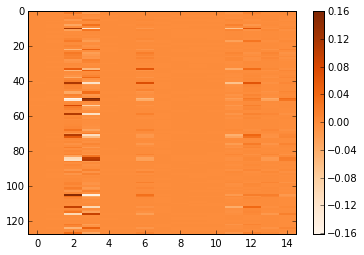

In [249]:
matrix=correlations.dropna().as_matrix()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
#plt.imshow(matrix.astype(np.float32))
plt.imshow(matrix.astype(np.float32), interpolation='nearest', cmap=plt.cm.Oranges, 
          aspect='auto') 
plt.colorbar()
plt.show()

(array([   1.,    0.,    1.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    1.,    1.,    2.,    1.,    0.,    2.,    1.,    0.,
           0.,    1.,    0.,    0.,    0.,    2.,    0.,    1.,    2.,
           2.,    1.,    1.,    3.,    6.,    3.,    6.,    4.,   10.,
          21.,   26.,   58.,  617.,  992.,   54.,   25.,   22.,   11.,
           2.,    5.,    3.,    7.,    2.,    1.,    1.,    1.,    2.,
           1.,    1.,    2.,    0.,    1.,    0.,    1.,    0.,    0.,
           1.,    2.,    0.,    1.,    2.,    1.,    1.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    1.,    0.,    1.]),
 array([-0.16104127, -0.15701524, -0.15298921, -0.14896318, -0.14493715,
        -0.14091112, -0.13688508, -0.13285905, -0.12883302, -0.12480699,
        -0.12078096, -0.11675492, -0.11272889, -0.10870286, -0.10467683,
        -0.1006508 , -0.09662476, -0.09259873, -0.0885727 , -0.08454667,
        -0.08052064, -0.07649461, -0.07246857, -0.06844254, -0.06441651,
 

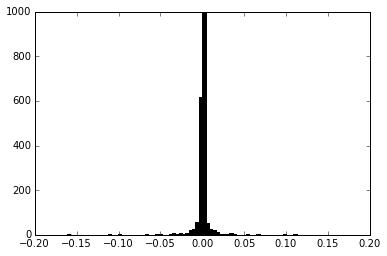

In [250]:
matrix_t=matrix.astype(np.float32)
plt.hist(matrix_t.ravel(), bins=80, fc='k', ec='k')

In [252]:
correlations.dropna()

,Median House Value,Median Age,White only percentage,Non-white percentage,Median Rent,Median Income,Normalized cars,Normalized High school,Normalized bachelors,Normalized masters,Normalized PHD,Normalized familiy household,Normalized non-family household,Normalized owner ocuppied,Normalized renter ocuppied
APPLIANCE,-1.339094e-09,-6.486616e-05,-0.01913778,0.01913778,-1.487037e-06,-2.248973e-08,-0.003814494,2.574597e-06,-4.151886e-06,-5.776792e-06,-1.824697e-05,-1.258928e-05,1.258928e-05,-0.002410412,0.002410412
Air Quality,3.035162e-09,2.884239e-05,0.0168779,-0.0168779,2.885052e-06,2.900848e-08,-0.0009754773,-7.365014e-06,1.166081e-05,9.91388e-06,2.121772e-05,-0.008029365,0.008029365,-0.0006102895,0.0006102895
Animal Abuse,-7.372185e-10,1.222641e-05,-0.001326839,0.001326839,1.981652e-07,3.99415e-09,0.0005093626,1.917657e-07,9.899554e-07,7.015459e-08,5.364145e-07,-0.00199566,0.00199566,-0.0001247549,0.0001247549
Animal in a Park,7.018676e-11,2.365278e-05,0.001379816,-0.001379816,-8.009011e-08,-8.505736e-11,0.0003029844,4.186467e-07,-1.9465e-07,-5.605613e-07,-4.221924e-07,-0.0002647131,0.0002647131,0.0002988754,-0.0002988754
Asbestos,6.670877e-10,5.773535e-06,0.005138749,-0.005138749,7.072067e-07,7.457372e-09,0.0001142842,-1.517791e-06,1.950467e-06,3.438641e-06,7.413478e-06,-0.0014612,0.0014612,0.0001042744,-0.0001042744
BEST/Site Safety,-1.33503e-09,2.920065e-05,-0.01425751,0.01425751,-6.870554e-08,-2.40203e-09,0.003358489,4.363038e-06,-1.550134e-06,-3.830387e-06,-1.05266e-05,0.002918521,-0.002918521,0.001987761,-0.001987761
Beach/Pool/Sauna Complaint,4.922747e-10,-3.721772e-06,0.002506102,-0.002506102,3.917862e-07,1.827566e-09,-2.322476e-05,1.051555e-06,6.964899e-07,1.895394e-06,-3.490459e-06,8.583305e-05,-8.583305e-05,-0.0002650743,0.0002650743
Bike/Roller/Skate Chronic,7.453346e-11,7.928948e-06,0.0002266429,-0.0002266429,2.898643e-07,3.627229e-09,0.00081296,-9.826218e-07,1.600895e-06,3.172716e-07,7.790331e-07,-0.0007953243,0.0007953243,0.0003059306,-0.0003059306
Blocked Driveway,-3.963003e-09,-9.293499e-05,-0.03074794,0.03074794,8.743077e-07,-5.21101e-08,0.003199331,3.097083e-05,-1.539355e-05,-3.372972e-05,-9.658203e-05,0.01261979,-0.01261979,0.001274863,-0.001274863
Boilers,-2.685034e-10,-1.738503e-06,-0.0004236285,0.0004236285,4.664339e-08,-8.538378e-11,-1.528722e-05,-2.552962e-07,-6.65207e-08,3.565111e-07,7.216924e-08,-0.0003554521,0.0003554521,-0.0002543533,0.0002543533


In [268]:
correlations_=correlations.dropna()

In [269]:
np.mean(correlations_)

Median House Value                 3.053960e-10
Median Age                         1.186255e-05
White only percentage              3.011980e-03
Non-white percentage              -3.011980e-03
Median Rent                        9.949779e-07
Median Income                      7.191946e-09
Normalized cars                    3.054948e-04
Normalized High school            -2.169106e-06
Normalized bachelors               4.064238e-06
Normalized masters                 2.396655e-06
Normalized PHD                     9.300092e-07
Normalized familiy household      -4.037462e-03
Normalized non-family household    4.037462e-03
Normalized owner ocuppied         -7.059355e-04
Normalized renter ocuppied         7.059355e-04
dtype: float64

In [270]:
correlations_.to_csv('correlations.csv')

In [255]:
corr_matrix=correlations.dropna().as_matrix()
corr_matrix

array([[-1.3390935e-09, -6.4866159e-05, -0.019137781, ..., 1.2589278e-05,
        -0.0024104123, 0.0024104123],
       [3.0351621e-09, 2.8842394e-05, 0.016877897, ..., 0.008029365,
        -0.00061028945, 0.00061028945],
       [-7.3721845e-10, 1.2226406e-05, -0.0013268386, ..., 0.0019956601,
        -0.00012475488, 0.00012475488],
       ..., 
       [-3.4147826e-10, 1.7261691e-05, 0.00028528852, ..., -0.00070503994,
        0.00096893124, -0.00096893124],
       [1.7766999e-10, 7.4174495e-06, 0.001767664, ..., -8.3101295e-05,
        0.00023765099, -0.00023765099],
       [2.1292181e-09, 0.00014169868, 0.0329119, ..., 0.012865966,
        0.0040076184, -0.0040076184]], dtype=object)

#Extraction of the types of complain with correlations with the variables above certain threshold

In [339]:
for i in range(0,len(corr_matrix)):
    t=np.sum(abs(corr_matrix[i]))
    if t>0.4:
        print i

41
50


In [369]:
type_s

'HEAT/HOT WATER'

In [368]:
type_s=correlations_.index[50]

In [370]:
correlations.loc[type_s,:]

Median House Value                -1.527297e-08
Median Age                        -0.0006150623
White only percentage                -0.1610413
Non-white percentage                  0.1610413
Median Rent                       -1.232174e-05
Median Income                     -2.119533e-07
Normalized cars                     -0.05096939
Normalized High school             8.977843e-07
Normalized bachelors               -2.70461e-05
Normalized masters                -3.887537e-05
Normalized PHD                    -6.448576e-05
Normalized familiy household        -0.02038438
Normalized non-family household      0.02038438
Normalized owner ocuppied           -0.03527598
Normalized renter ocuppied           0.03527598
Name: HEAT/HOT WATER, dtype: object

###Note that for heat/hot water complains, the race indicator, the family household and the renter/owner ocuppied ratio, have stronger effect than the other variables

In [371]:
A=correlations.loc[type_s,:]
ids=A[A>1e-04].index

In [372]:
ids

Index([u'Non-white percentage', u'Normalized non-family household',
       u'Normalized renter ocuppied'],
      dtype='object')

In [373]:
results_frame[results_frame['type']==type_s]

,type,best_alpha,R2,sample_size
40,HEAT/HOT WATER,0,0.2147645,1890


In [380]:
typeof=type_s
A2=np.append(np.append(np.append(regressors,typeof),'BoroCT2010'),'total_calls')
myframe11=callsbytype_attributes[A2].dropna()
myframe1=pd.merge(myframe11,population_2014,on=['BoroCT2010'],how='inner')
if len(myframe1)>100:
    X=myframe1[regressors]
    Y=myframe1[typeof]/myframe1['pop']
    #LASSO
    X_pre_train, X_test, label_pre_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
    X_train, X_val, Y_train, Y_val = train_test_split(X_pre_train, label_pre_train, test_size=0.25, random_state=1)
    R2_store=[]
    for i in linspace(-40,40,200):
        Lasso = linear_model.Lasso(fit_intercept=True,alpha=i)
        Lasso.fit(X_train,Y_train)
        R2_OS = 1 - np.var(Lasso.predict(X_val) - Y_val) / np.var(Y_val)
        R2_store.append(R2_OS)
    optim_alpha=linspace(-40,40,200)[np.where(R2_store==np.max(R2_store))[0][0]]
    Lasso = linear_model.Lasso(fit_intercept=True,alpha=optim_alpha)
    Lasso.fit(X_train,Y_train)
    R2_OS = 1 - np.var(Lasso.predict(X_test) - Y_test) / np.var(Y_test)
    print R2_OS
    print len(myframe1)

0.07494055793
1890


In [381]:
optim_alpha

0.20100502512563168

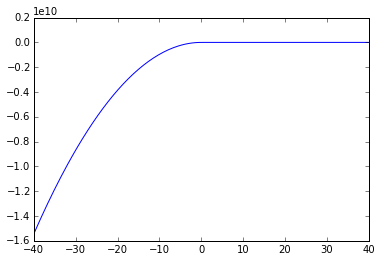

In [382]:
plt.plot(linspace(-40,40,200),R2_store)

In [386]:
print Lasso.intercept_
Lasso.coef_

0.0338565260617


array([ -2.68749035e-09,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -2.41159018e-07,
        -0.00000000e+00,  -1.13123798e-05,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,   0.00000000e+00])

In [384]:
X.columns

Index([u'Median House Value', u'Median Age', u'White only percentage',
       u'Non-white percentage', u'Median Rent', u'Median Income',
       u'Normalized cars', u'Normalized High school', u'Normalized bachelors',
       u'Normalized masters', u'Normalized PHD',
       u'Normalized familiy household', u'Normalized non-family household',
       u'Normalized owner ocuppied', u'Normalized renter ocuppied'],
      dtype='object')

# Now, we will try random forest classifier

In [387]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

In [388]:
names = X.columns
rf = RandomForestRegressor()
rf.fit(X, Y)
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)

Features sorted by their score:
[(0.1581, 'Normalized owner ocuppied'), (0.1383, 'Median Rent'), (0.1191, 'Normalized renter ocuppied'), (0.0719, 'Median House Value'), (0.0703, 'Non-white percentage'), (0.07, 'White only percentage'), (0.0645, 'Median Age'), (0.0562, 'Normalized cars'), (0.0417, 'Normalized PHD'), (0.0384, 'Normalized masters'), (0.0372, 'Normalized non-family household'), (0.0362, 'Normalized bachelors'), (0.034, 'Median Income'), (0.0336, 'Normalized High school'), (0.0305, 'Normalized familiy household')]
